<a href="https://colab.research.google.com/github/SebastianOrmaechea/Anyone-Final-Project-Team-2/blob/Sebastian-Ormaechea/In_Out_Classif_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import io
import os
import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import metrics

%matplotlib inline

In [2]:
ruta="/content/drive/MyDrive/autos_int/int_train"
int_train=[]
for img in os.listdir(ruta):
  try:
    img=cv2.imread(os.path.join(ruta,img))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Esto es para pasarlo de RGB a escala de grises
    img=cv2.resize(img,(128,128)) # Esto es para cambiar el shape original de las imagenes a un shape uniforme para todas las imag
    img=cv2.bitwise_not(img) # Esto es para invertir el fondo blanco y colocarlo como negro 
    int_train.append([img])
  except: continue

In [3]:
ruta="/content/drive/MyDrive/autos_ext/ext_train"
ext_train=[]
for img in os.listdir(ruta):
  try:
    img=cv2.imread(os.path.join(ruta,img))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Esto es para pasarlo de RGB a escala de grises
    img=cv2.resize(img,(128,128)) # Esto es para cambiar el shape original de las imagenes a un shape uniforme para todas las imag
    img=cv2.bitwise_not(img) # Esto es para invertir el fondo blanco y colocarlo como negro 
    ext_train.append([img])
  except: continue

In [4]:
cars_train = int_train + ext_train
cars_train

[[array([[ 23,  24,  24, ...,  20,  23,  30],
         [ 20,  20,  20, ...,  26,  25,  27],
         [ 20,  27,  19, ...,  28,  30,  33],
         ...,
         [240, 233, 210, ..., 255, 255, 255],
         [242, 237, 215, ..., 255, 255, 255],
         [245, 234, 214, ..., 255, 255, 255]], dtype=uint8)],
 [array([[112, 112, 112, ..., 125, 127, 130],
         [112, 112, 112, ..., 127, 128, 130],
         [113, 113, 112, ..., 129, 132, 134],
         ...,
         [145, 129, 117, ..., 213, 127,  67],
         [113, 113, 107, ..., 214,  83,  67],
         [114, 113, 106, ..., 145,  52,  71]], dtype=uint8)],
 [array([[ 98,  99,  99, ..., 224, 224, 227],
         [101, 102, 102, ..., 224, 222, 227],
         [104, 104, 105, ..., 223, 222, 226],
         ...,
         [107, 116, 113, ...,  47,  47,  45],
         [112, 113, 115, ...,  47,  46,  42],
         [113, 113, 115, ...,  48,  47,  44]], dtype=uint8)],
 [array([[ 26,  25,  23, ...,  70,  54,  34],
         [ 26,  25,  23, ...,  84,  

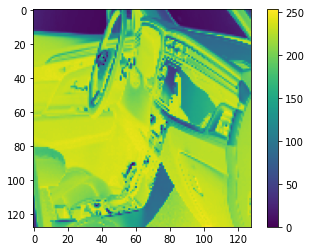

In [5]:
plt.figure()
plt.imshow(np.squeeze(cars_train[3]))
plt.colorbar()
plt.grid(False)
plt.show()

In [6]:
np_cars_train = np.array(cars_train)
np_cars_train.shape

(200, 1, 128, 128)

In [7]:
np_cars_train = np.reshape(np_cars_train, (200,128,128))
np_cars_train.shape

(200, 128, 128)

In [8]:
# Antes de entrenar la red neuronal escalamos valores en rango 0 a 1. Para ello, dividimos los valores por 255
train_images = np_cars_train / 255.0
train_images

array([[[0.09019608, 0.09411765, 0.09411765, ..., 0.07843137,
         0.09019608, 0.11764706],
        [0.07843137, 0.07843137, 0.07843137, ..., 0.10196078,
         0.09803922, 0.10588235],
        [0.07843137, 0.10588235, 0.0745098 , ..., 0.10980392,
         0.11764706, 0.12941176],
        ...,
        [0.94117647, 0.91372549, 0.82352941, ..., 1.        ,
         1.        , 1.        ],
        [0.94901961, 0.92941176, 0.84313725, ..., 1.        ,
         1.        , 1.        ],
        [0.96078431, 0.91764706, 0.83921569, ..., 1.        ,
         1.        , 1.        ]],

       [[0.43921569, 0.43921569, 0.43921569, ..., 0.49019608,
         0.49803922, 0.50980392],
        [0.43921569, 0.43921569, 0.43921569, ..., 0.49803922,
         0.50196078, 0.50980392],
        [0.44313725, 0.44313725, 0.43921569, ..., 0.50588235,
         0.51764706, 0.5254902 ],
        ...,
        [0.56862745, 0.50588235, 0.45882353, ..., 0.83529412,
         0.49803922, 0.2627451 ],
        [0.4

In [9]:
# Configuro capas del modelo
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(128, 128)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [10]:
# Compilo el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
arr0 = [0] * 100
arr1 = [1] * 100
train_labels = arr0 + arr1
train_labels = np.array(train_labels)
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [12]:
# Entreno el modelo
model.fit(train_images, train_labels, epochs=40)

Epoch 1/40
7/7 [==============================] - 1s 27ms/step - loss: 5.8479 - accuracy: 0.4000
Epoch 2/40
7/7 [==============================] - 0s 31ms/step - loss: 4.9524 - accuracy: 0.4950
Epoch 3/40
7/7 [==============================] - 0s 29ms/step - loss: 2.3977 - accuracy: 0.6700
Epoch 4/40
7/7 [==============================] - 0s 39ms/step - loss: 1.2223 - accuracy: 0.7300
Epoch 5/40
7/7 [==============================] - 0s 30ms/step - loss: 0.6260 - accuracy: 0.8000
Epoch 6/40
7/7 [==============================] - 0s 28ms/step - loss: 0.3103 - accuracy: 0.8900
Epoch 7/40
7/7 [==============================] - 0s 37ms/step - loss: 0.2590 - accuracy: 0.8900
Epoch 8/40
7/7 [==============================] - 0s 32ms/step - loss: 0.4273 - accuracy: 0.8500
Epoch 9/40
7/7 [==============================] - 0s 28ms/step - loss: 0.3598 - accuracy: 0.8700
Epoch 10/40
7/7 [==============================] - 0s 29ms/step - loss: 0.2282 - accuracy: 0.9100
Epoch 11/40
7/7 [============

In [13]:
ruta="/content/drive/MyDrive/autos_int/int_test"
int_test=[]
for img in os.listdir(ruta):
  try:
    img=cv2.imread(os.path.join(ruta,img))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Esto es para pasarlo de RGB a escala de grises
    img=cv2.resize(img,(128,128)) # Esto es para cambiar el shape original de las imagenes a un shape uniforme para todas las imag
    img=cv2.bitwise_not(img) # Esto es para invertir el fondo blanco y colocarlo como negro 
    int_test.append([img])
  except: continue

In [14]:
ruta="/content/drive/MyDrive/autos_ext/ext_test"
ext_test=[]
for img in os.listdir(ruta):
  try:
    img=cv2.imread(os.path.join(ruta,img))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) # Esto es para pasarlo de RGB a escala de grises
    img=cv2.resize(img,(128,128)) # Esto es para cambiar el shape original de las imagenes a un shape uniforme para todas las imag
    img=cv2.bitwise_not(img) # Esto es para invertir el fondo blanco y colocarlo como negro 
    ext_test.append([img])
  except: continue

In [15]:
cars_test = int_test + ext_test

In [16]:
np_cars_test = np.array(cars_test)
np_cars_test.shape

(110, 1, 128, 128)

In [17]:
np_cars_test = np.reshape(np_cars_test, (110,128,128))
np_cars_test.shape

(110, 128, 128)

In [18]:
test_images = np_cars_test / 255.0

In [19]:
arr0 = [0] * 55
arr1 = [1] * 55
test_labels = arr0 + arr1
test_labels = np.array(test_labels)
test_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [20]:
# Evalúo el modelo
results = model.evaluate(test_images,  test_labels, verbose=2)

print(model.metrics_names)
print(results)

4/4 - 0s - loss: 0.7190 - accuracy: 0.8364 - 403ms/epoch - 101ms/step
['loss', 'accuracy']
[0.7190309762954712, 0.8363636136054993]


In [21]:
predictions = model.predict(test_images)

4/4 [==============================] - 0s 6ms/step


In [22]:
class_names = ['interior', 'exterior']
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

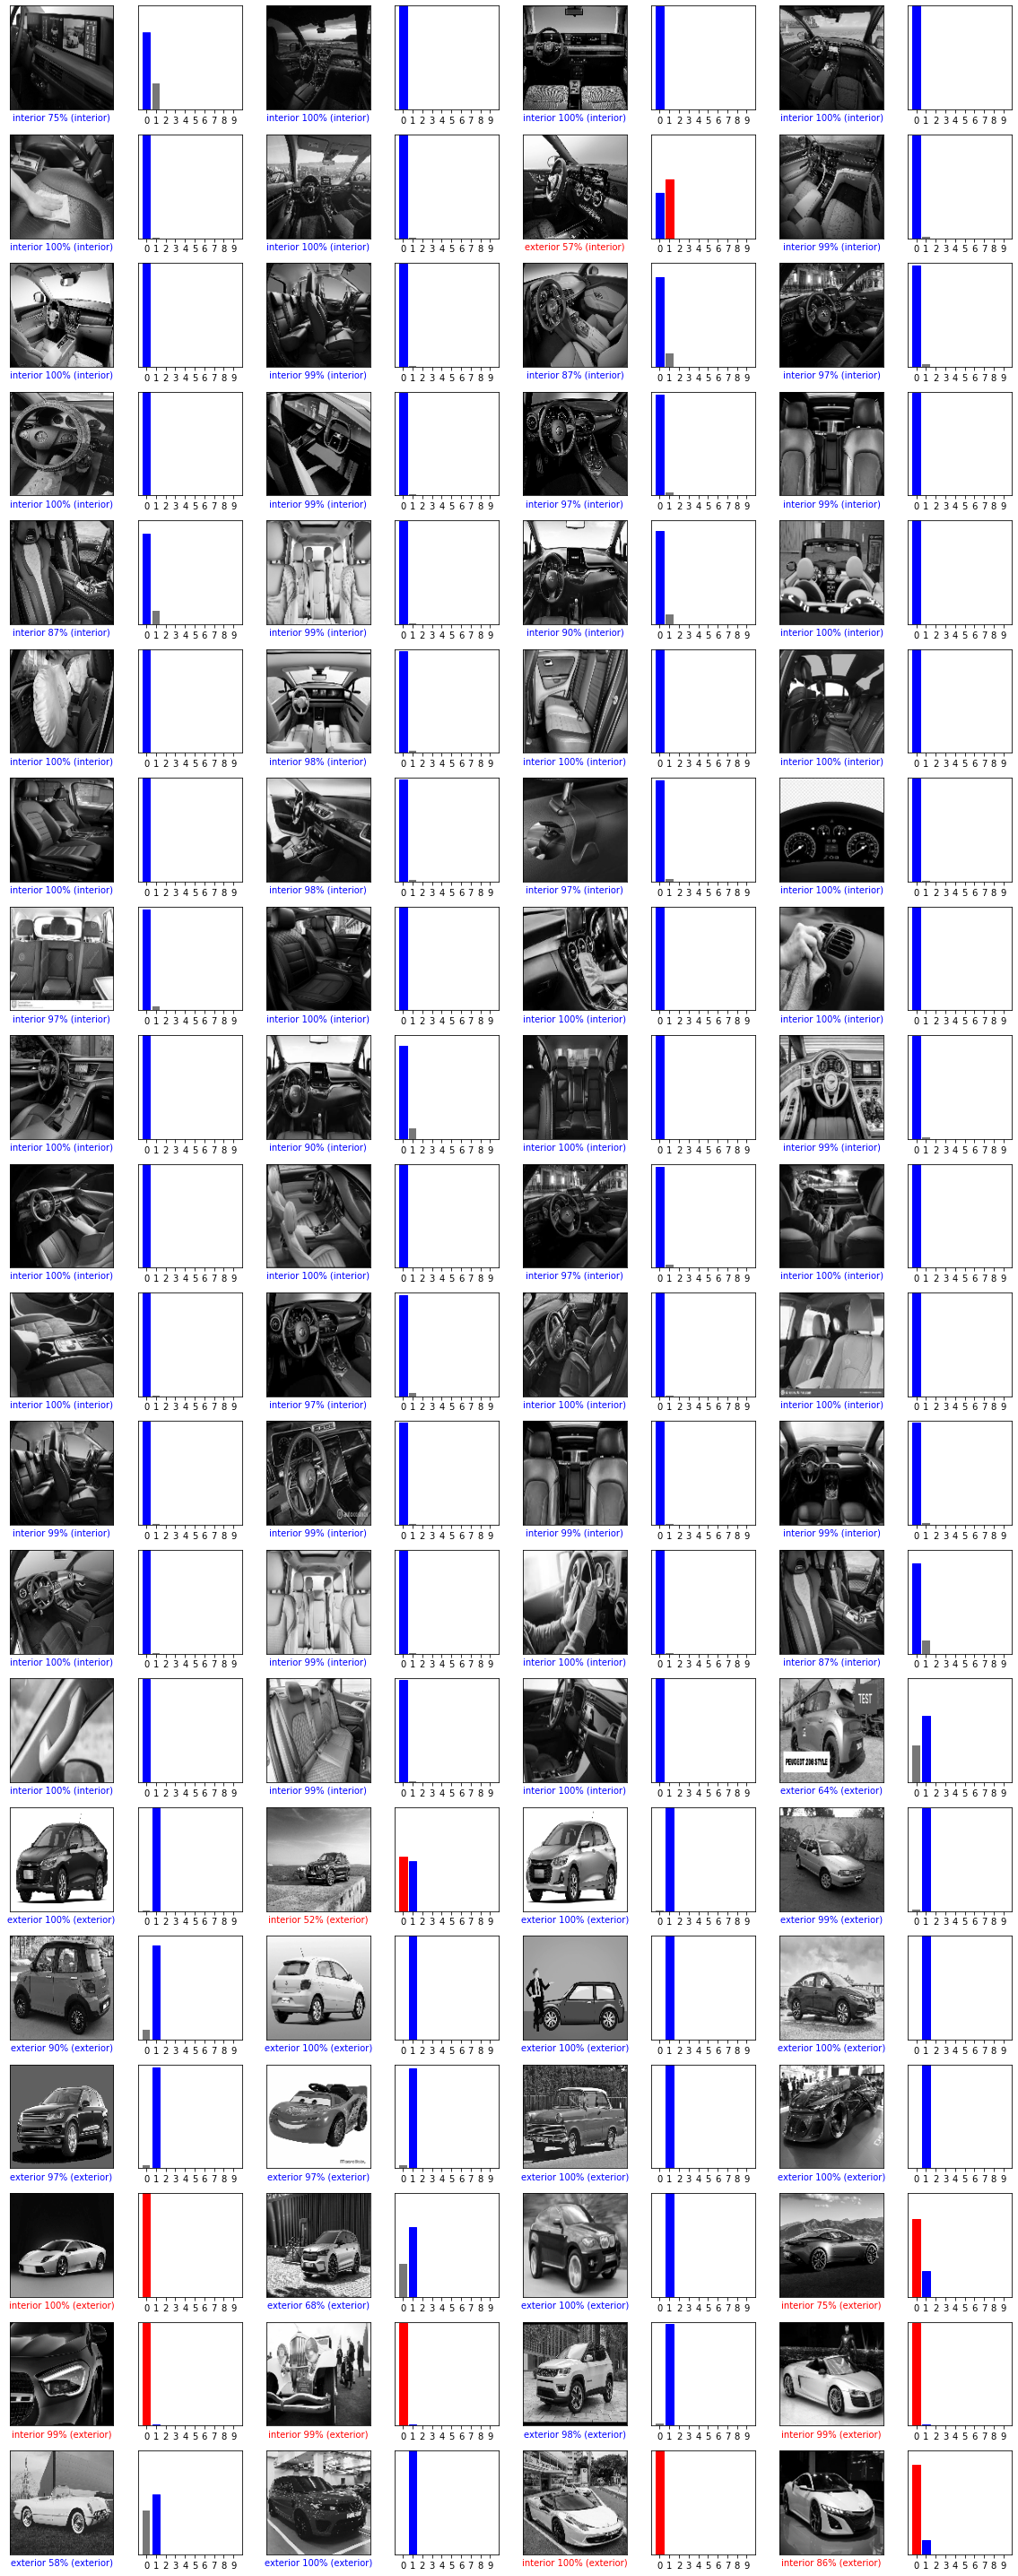

In [23]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()